<a href="https://colab.research.google.com/github/haziyevv/Algorithms-and-DataStructures/blob/master/ABB_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Part 1: General Questions**


1.1) There is a high class imbalance in this dataset. Dominant class is predicted most of the time, which caused high accuracy and low f1. For example: Project is cancer detection and we have 1000 data and 910 of them are not cancer and the rest are. If we create a naive model and say all the patients are free of cancer, then we will have 91% accuracy but 0% precison in detecting cancer patients.

1.2) It is 98 %

**1.3**

In [2]:
# a)
mean = 0.91
var = 0.0004

alpha = ((1-mean)/var - 1/mean)*mean**2
beta = alpha*(1/mean - 1)
print(alpha, beta)

185.41249999999994 18.33749999999997


In [5]:
# b)
theta1 = (19/20 + alpha - 1) / (1+alpha + beta - 2)
theta2 = (830/890 + alpha - 1) / (1+alpha + beta - 2)
print("first one") if theta1 > theta2 else print("second one") 

first one


In [6]:
# c)
theta1 = 19/20
theta2 = 83/89
print("first one") if theta1 > theta2 else print("second one") 

first one


In [ ]:
# d) 


**1.4**)
 I would chose 10 Principal Components, as it explains the maximum amount of variance.

**1.5**) We need to decrease the average within cluster distance. So, I would select 4 clusters, because more than that does not decrase the average-within cluster distance.

**1.6**) D is the correct answer a,b and c are incorrect. D is correct, because if we increase depth by one stock value will decrease by 5.

1.6) e-> It implies that, up to 2 million depth, stock value will be above 0.

**1.7)**

In [12]:
import numpy as np
def func(xt_1, xt_2, xt_3, a, b, c, d):
    return a*xt_1 + b*np.sqrt(xt_2) + c*xt_3 + d

X = [1, 2]
for t in range(2,60):
    X.append(0.9*X[t-1] - 0.6*np.sqrt(X[t-2]) + 2)
X = np.array(X)
a,b,c,d = 1,1,1,1
l_rate = 0.1
predictions = []

for epoch in range(200):
    loss = 0
    predictions = []
    for t in range(3, 60):
        y_hat = func(X[t-1], X[t-2], X[t-3], a, b, c, d)
        predictions.append(y_hat)
        y = X[t]
        error = y_hat - y
        loss += (y_hat - y)**2
        a = a - l_rate*2*error*X[t-1]/60
        b = b - l_rate*2*error*np.sqrt(X[t-2])/60
        c = c - l_rate*2*error*X[t-2]/60
        d = d - l_rate*2*error/60
    #print(f"Epoch: {epoch}, loss: {loss}")

print(f"a:{a}, b: {b}, c: {c}, d: {d}")
print(f"The error is: {sum([(y_hat - y)**2 for y_hat, y in zip(X[3:], predictions)])}")

a:0.494540429652801, b: 0.8214561284908943, c: -0.031974178329960225, d: 1.0981582584536325
The error is: 0.05619268806986162


**2. Neural Network Architectures**

2.1) 
y = -2.5*f(x-0.01) - 1

In [16]:
# 2.2) 
dimension = 1+(227+4-11)/4
# volume size is: 56x56X96
parameters = 11*11*96
# number of parameters: 11616

In [17]:
# 2.3)
print(f"Volume size is {1+(227-3)/2}")

Volume size is 113.0


**2.4** It is the backpropagation applied to time series data.

**2.5)** <br>
1-Image is present, find the caption <br>
2-Text is given, find its sentiment <br>
3-Machine translation <br>
4-Classifying each frame in a video


2.6) Euclidean distance can be used. Also 1-cosine similarity will give a clue how dissimilar are the two vectors.

**3. Reinforcement Learning**

3.1 Trying to maximize the reward by taking the best action for each state. Q-table is usedi where rows are the states and columns are the actions. It is a value based function, where we calculate the maximum expected future rewards for action at each state.

3.2 Exploration is finding more information about an environment. Like in a multi armed bandit problem, trying to find the best option.
Exploitation is exploiting the found option to maximize the rewards.

In [18]:
# 3.3

Multi armed bandit problem is the most naive reinforcement learning problem, where you try to find the best option from given n options and maximize the reward.

In epsilon greedy algorithm, you give a rate to how much explore and how much to exploit the information.

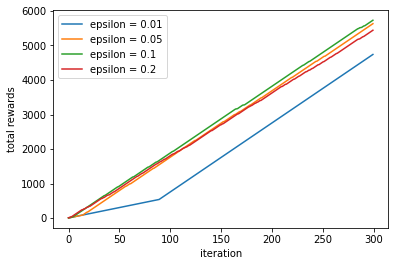

In [19]:
from uuid import uuid4
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import logging
from collections import defaultdict


class Bandit:
    def __init__(self, m):
        """
        Simulates bandit.
        Args:
            m (float): True mean.
        """

        self.m = m
        self.id = uuid4()

    def pull(self):
        """
        Simulate pulling the arm of the bandit.
        Normal distribution with mu = self.m and sigma = 1.
        """
        reward = np.random.normal(self.m, 0.1, 1)[0] + self.m

        return reward

class EpsilonGreedyAgent:
    def __init__(self, bandits, epsilon):
        self.bandits = bandits
        self.epsilon = epsilon
        self.record = defaultdict(lambda: dict(actions=0, reward=0))
        self.all_rewards = []
        self.total_actions = 0
        
    def _get_random_bandit(self):
        return np.random.choice(self.bandits)

    def _get_current_best_bandit(self):
        estimates = []
        for bandit in self.bandits:
            bandit_record = self.record[bandit]
            if not bandit_record['actions']:
                estimates.append(0)
            else:
                estimates.append(bandit_record['reward'] / bandit_record['actions'])

        return self.bandits[np.argmax(estimates)]

    def _choose_bandit(self):
        p = np.random.uniform(0, 1, 1)
        if p < self.epsilon:
            bandit = self._get_random_bandit()
        else:
            bandit = self._get_current_best_bandit()

        return bandit

    def take_action(self):
        current_bandit = self._choose_bandit()
        reward = current_bandit.pull()
        self.record[current_bandit]["actions"] += 1
        self.record[current_bandit]["reward"] += reward
        self.all_rewards.append(reward)
        self.total_actions += 1
        return reward

    def take_actions(self, iter):
        for _ in range(iter):
            self.take_action()

def compare_epsilons(epsilons, bandits_true_means, iterations):
    """
    Compare different epsilons for epsilon-greedy algorithm.
    """
    agents = []
    bandits = [Bandit(m) for m in bandits_true_means]

    for epsilon in epsilons:
        agent = EpsilonGreedyAgent(bandits=bandits, epsilon=epsilon)
        agent.take_actions(iterations)
        agents.append(agent)

    return agents, epsilons

epsilons = [0.01, 0.05, 0.1, 0.2]
bandits_means = [3, 5, 10]

iterations = 300
agents, _ =  compare_epsilons(epsilons, bandits_means, iterations)

all_rewards = [agent.all_rewards for agent in agents]


for i in range(len(agents)):
    plt.plot(
        np.cumsum(all_rewards[i]), 
        label="epsilon = {}".format(epsilons[i] or '1 / iter'),
    )

plt.xlabel("iteration")
plt.ylabel("total rewards")
plt.legend()